# Performance Comparison

In [6]:
# Agent config
num_agents = 400
agent_radius = 0.5

# Map config
map_type = "cross" # Available maps: empty, corridor, obstacle, cross
num_samples = 200     # Available num_agent: 50, 100, 200, 400, 500



In [7]:
# Load map and instance
import os
import pickle

from swarm_prm.utils.agent_assignment import get_agent_assignment

map_fname = "{}_{}.pkl".format(map_type, num_samples)
fname = os.path.join("maps", map_fname)
with open(fname, "rb") as f:
    gaussian_prm = pickle.load(f)

# Instance config
starts_weight = [0.5, 0.5]
goals_weight = [0.5, 0.5]

starts_agent_count = get_agent_assignment(num_agents, starts_weight)
goals_agent_count = get_agent_assignment(num_agents, goals_weight)

In [8]:
# TEG
from swarm_prm.solvers.macro.teg import TEG

teg_graph= TEG(gaussian_prm, agent_radius, 
               starts_agent_count=starts_agent_count, goals_agent_count=goals_agent_count,
               num_agents=num_agents, max_timestep=500)
timestep, flow_dict, residual_dict= teg_graph.get_earliest_timestep()

AssertionError: Start capacity smaller than required.

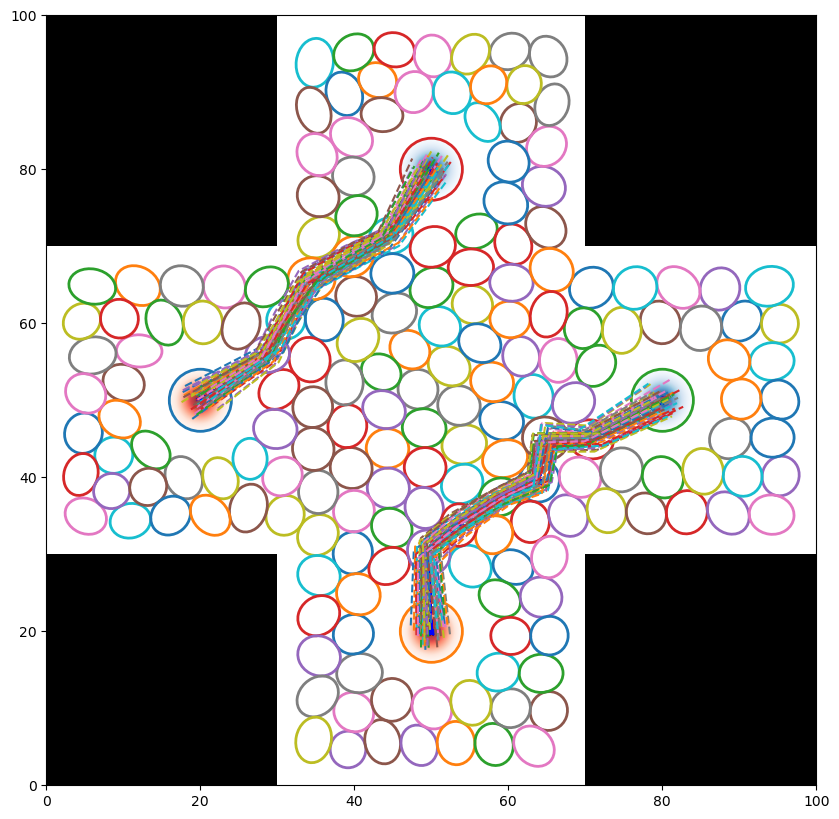

In [ ]:
from matplotlib import pyplot as plt
from swarm_prm.solvers.micro import GaussianTrajectorySolver

simple_paths, _ = gaussian_prm.get_solution(flow_dict, timestep, num_agents)
macro_solution = gaussian_prm.get_macro_solution(flow_dict)

timestep = max(macro_solution.keys())

gt_solver = GaussianTrajectorySolver(gaussian_prm, macro_solution, timestep, num_agents, 
                                     starts_agent_count=starts_agent_count,
                                     goals_agent_count=goals_agent_count,
                                     safety_gap=0)

gt_paths = gt_solver.solve()
fig, ax = gaussian_prm.visualize_g_nodes()

for path in simple_paths:
    x_coords = [loc[0] for loc in path]
    y_coords = [loc[1] for loc in path]
    ax.plot(x_coords, y_coords, '-*', label='Path', color='blue')
# 
cmap = plt.get_cmap("tab10")
# 
for i, path in enumerate(gt_paths):
    x_coords = [loc[0] for loc in path]
    y_coords = [loc[1] for loc in path]
    ax.plot(x_coords, y_coords, '--', label='Path', color=cmap(i%10))

plt.show()